# Bike-sharing

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
* The model should be built taking this 'cnt' as the target variable.

In [1]:
# Importing Libs
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score

In [2]:
# Reading data
original_df = pd.read_csv("./day.csv", index_col=1)
# Droping instant feature since it is index 
original_df.drop("instant", axis=1, inplace=True)
original_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


### Checking data quality

In [3]:
# Checking NA values
original_df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**No NA values in data**

In [4]:
# Checking data types
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 01-01-2018 to 31-12-2019
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 85.5+ KB


**All columns are numeric**

In [5]:
# Checking data description
original_df.describe().loc[["min", "50%" ,"max"]]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.424346,3.953480,0.000,1.500244,2.0,20.0,22.0
50%,3.0,0.5,7.0,0.0,3.0,1.0,1.0,20.465826,24.368225,62.625,12.125325,717.0,3664.5,4548.5
max,4.0,1.0,12.0,1.0,6.0,1.0,3.0,35.328347,42.044800,97.250,34.000021,3410.0,6946.0,8714.0


**All data in close range**

### Checking overall trend

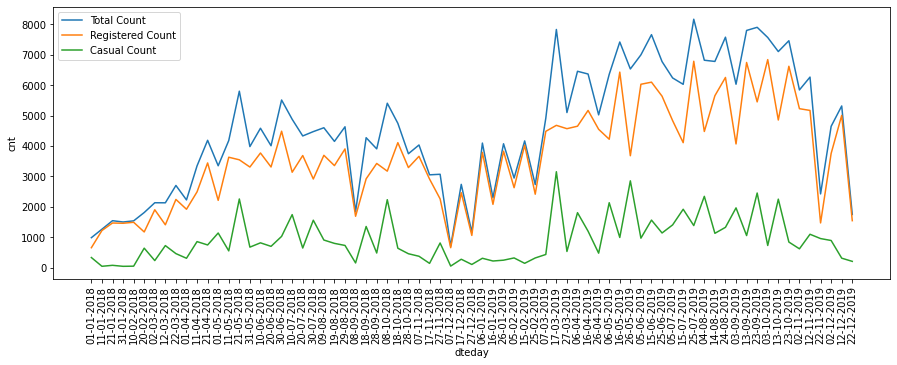

In [6]:
# Month vs count
# Taking some samples to plot 
sample = original_df[::10]
fig = plt.figure(figsize=(15,5))
sns.lineplot(y = sample["cnt"], x = sample.index, legend='brief', label="Total Count")
sns.lineplot(y = sample.registered, x = sample.index, legend='brief', label="Registered Count")
ax = sns.lineplot(y = sample.casual, x = sample.index, legend='brief', label="Casual Count")
plt.xticks(rotation=90)
plt.show()

- In month of jan bike-sharing is at minimum<br>
- It continiously increases till month of may<br>
- It stays at peak from may to oct<br>
- It decreases from oct to dec<br>

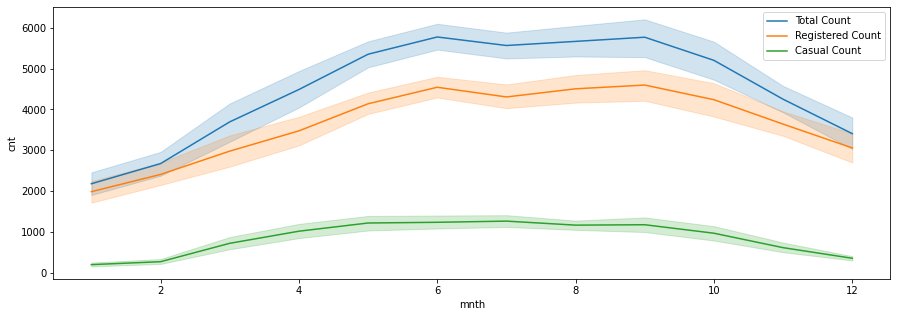

In [7]:
# Month vs count
fig = plt.figure(figsize=(15,5))
sns.lineplot(y = original_df["cnt"], x = original_df.mnth, legend='brief', label="Total Count")
sns.lineplot(y = original_df.registered, x = original_df.mnth, legend='brief', label="Registered Count")
ax = sns.lineplot(y = original_df.casual, x = original_df.mnth, legend='brief', label="Casual Count")
plt.show()

- In january demand is at lowest
- Demand increases from feb to june
- From jun to oct it remains at peak
- Demand decreases from Nov to dec

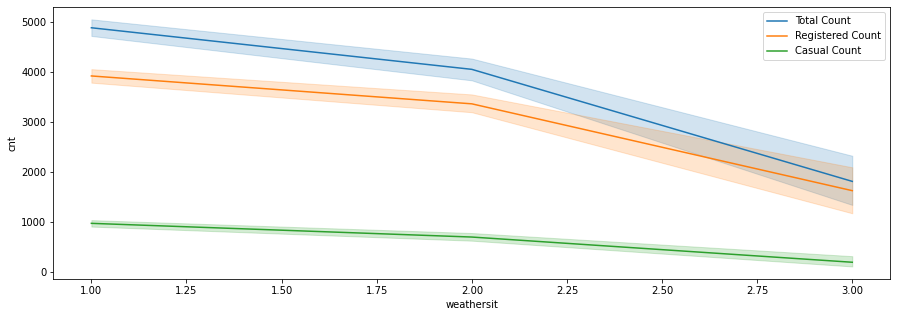

In [8]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(y = original_df["cnt"], x = original_df.weathersit, legend='brief', label="Total Count")
sns.lineplot(y = original_df.registered, x = original_df.weathersit, legend='brief', label="Registered Count")
ax = sns.lineplot(y = original_df.casual, x = original_df.weathersit, legend='brief', label="Casual Count")
plt.show()

- Most demand comes when weather is Clear, Few clouds, Partly cloudy, Partly cloudy
- Demand are moderate when weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Lowesr demand when weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- No demand when weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Defining dataset in type numerical/cateogrical

In [9]:
numerical = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
categorical = ["season", "yr", "mnth", "weekday", "workingday", "weathersit", "holiday"]

### Checking distribution of numerical data

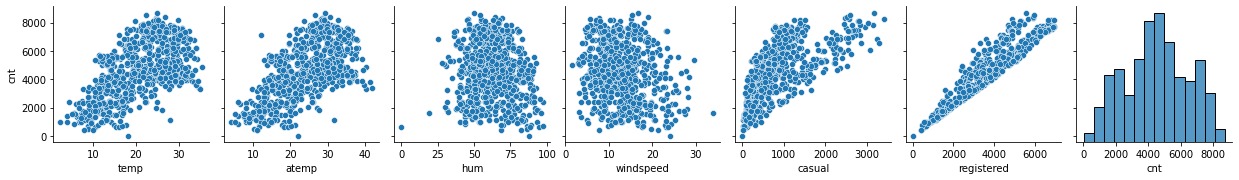

In [10]:
sns.pairplot(original_df[numerical], y_vars="cnt")

- Casual and registered are highly co related to cnt since cnt is sum of them.<br>
- Windspeed to affect cnt since there is clear linear relation between cnt and windspeed
- Tempratue and feel temprature have good correlation with cnt
- Humidity seems to have low inverse correlation with cnt

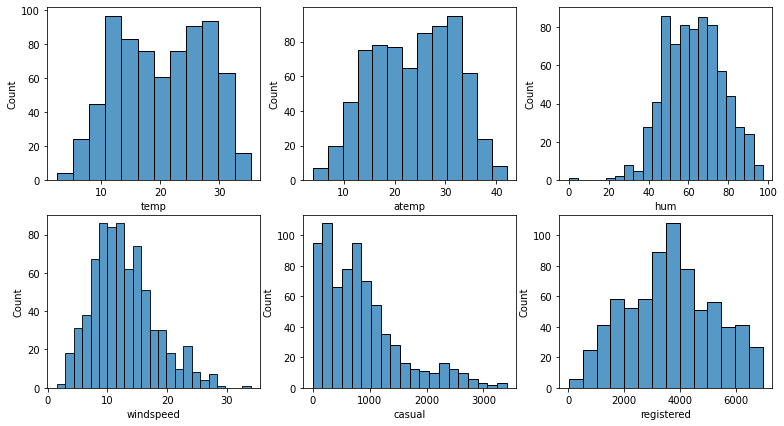

In [11]:
# Checking distribution of numerical columns
fig, ax = plt.subplots(2,3,figsize=(13,7))
for itr, num in enumerate(numerical[:-1]):
    sns.histplot(original_df[num], ax = ax[itr//3, itr%3])

- All distribution seem to be normal except **casual** which is in log scale
- There is a 0 value in **humidity** which seems to be outlier.

### Checking distribution of categorical data

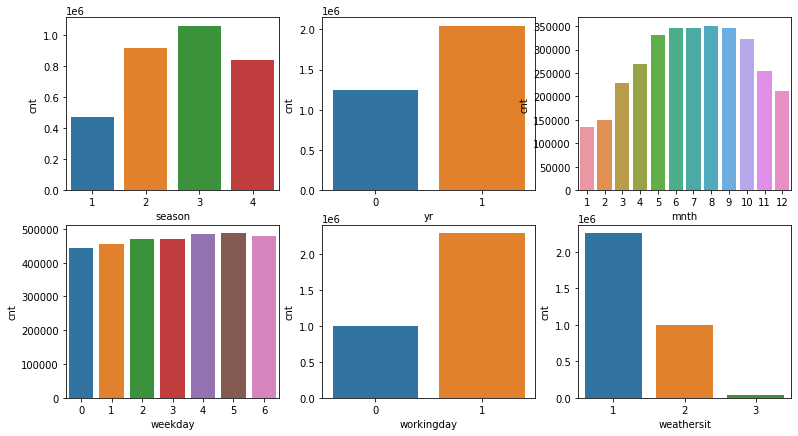

In [12]:
fig, ax = plt.subplots(2,3,figsize=(13,7))
for itr, cat in enumerate(categorical[:-1]):
    temp = original_df.groupby(cat).sum()
    sns.barplot(data = temp, x=temp.index, y="cnt", ax = ax[itr//3, itr%3])

- Year: Total Demand increased from 2018 to 2019 since there is groth in company
- Season: 
    - In Spring season thers is lowest demand
    - In Summer and winter demand is good
    - In fall demand is at highest
- Month:
    - In january demand is at lowest
    - Demand increases from feb to june
    - From jun to oct it remains at peak
    - Demand decreases from Nov to dec
- Weekday:
    - On Sunday, Monday there is less number of demand
    - Demand increasing in Tuesday, Wednesday, Saturday
    - On Thrusday, Friday demand is at peak
- Workingday:
    - There is more demand in working days in comparision to non working days
- Weathersit
    - Most demand comes when weather is Clear, Few clouds, Partly cloudy, Partly cloudy
    - Demand are moderate when weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Lowesr demand when weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - No demand when weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [13]:
# Before processing further we are removing registered and casual since we are not analysing them
original_df.drop(["registered", "casual"], axis=1, inplace=True)
numerical = ["temp", "atemp", "hum", "windspeed", "cnt"]
categorical = ["season", "yr", "mnth", "weekday", "workingday", "weathersit", "holiday"]

### Checking for outlier

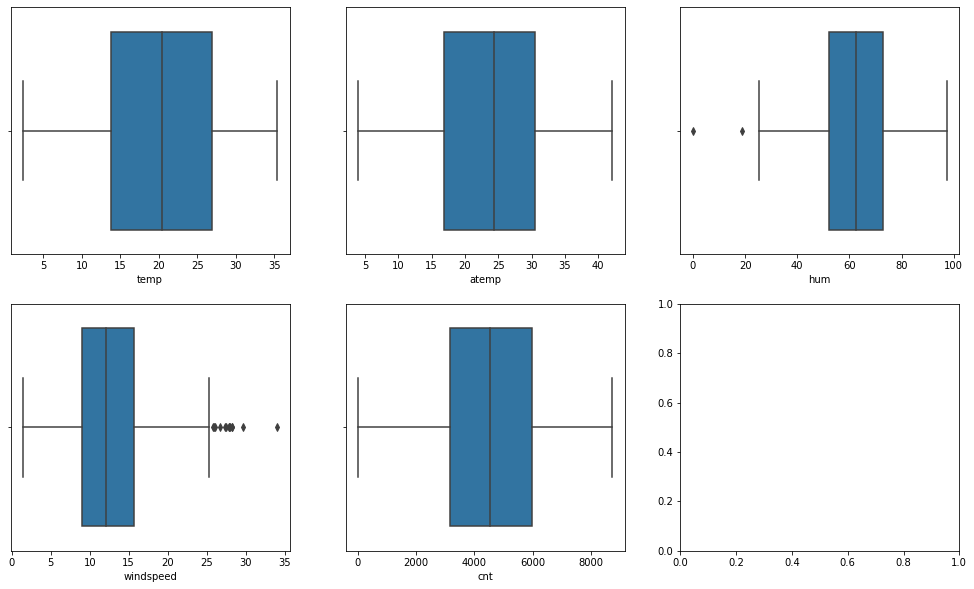

In [14]:
fig, ax = plt.subplots(2,3,figsize=(17,10))
for itr, num in enumerate(numerical):
    sns.boxplot(data = original_df, x = num, ax = ax[itr//3, itr%3])

- There is a outlier in Humidity whose value is 0, We will replace it with mean
- There are outlier in windspeed but This windspeed is possible in natural conditions, we will not remove them

In [15]:
# Replacing 0 Humidity value with mean
hum_mean = original_df[ (original_df.yr==0) & (original_df.mnth==3)].hum.mean()
original_df.loc["10-03-2018", "hum"] = hum_mean

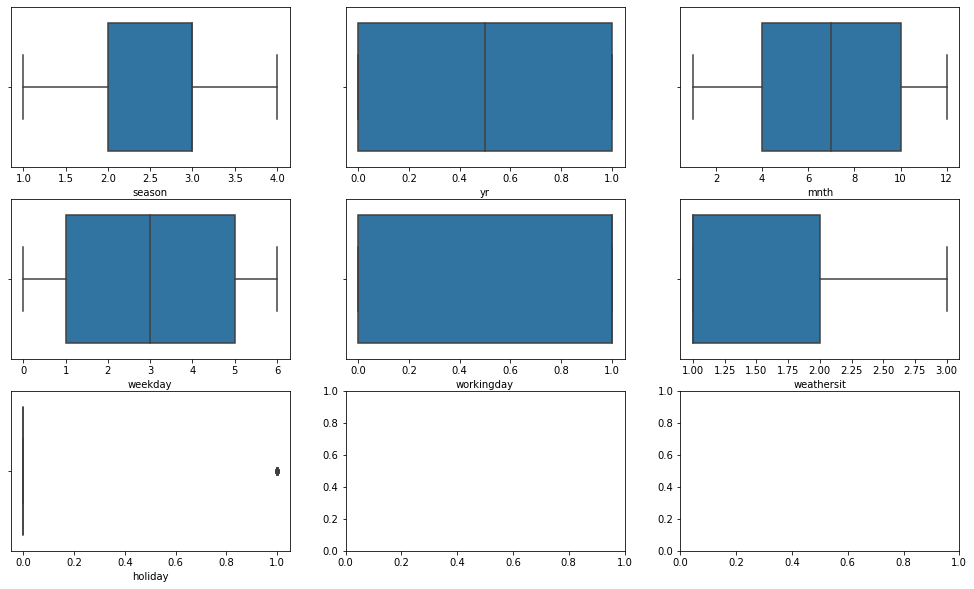

In [16]:
fig, ax = plt.subplots(3,3,figsize=(17,10))
for itr, num in enumerate(categorical):
    sns.boxplot(data = original_df, x = num, ax = ax[itr//3, itr%3])

- Data is good for categorical values

### Checking coorelation

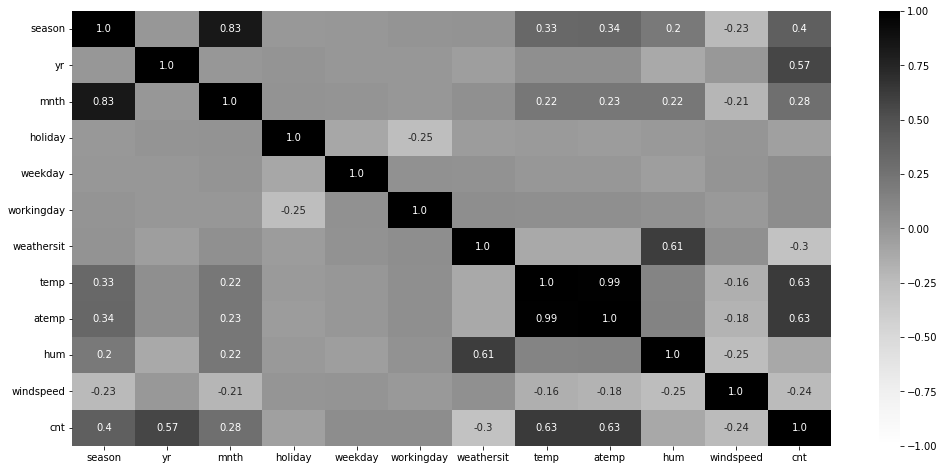

In [17]:
plt.figure(figsize=(17,8))
ax = sns.heatmap(original_df.corr(), annot=True, fmt=".2", cmap="Greys",  vmin=-1, vmax=1)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.15:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("")
plt.show()

- Cnt is positivly correlated to Year, Season, Month, Temprature, Atemprature
- Cnt have negative correlation with windspeed
- Cnt have no correlation with Humidity
- temp and a temp have multicolinearity, we will remove one of them
- Weathersit and Humidity have good correlation

In [18]:
# Removing atemp from data since it have high correlation with temp
original_df.drop("atemp", inplace=True, axis=1)
numerical = ["temp", "hum", "windspeed"]
categorical = ["yr", "season", "mnth", "holiday", "weekday", "workingday", "weathersit"]

### Spliting data

In [19]:
target = original_df["cnt"]
data = original_df[original_df.columns[original_df.columns != "cnt"]]
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.20, random_state=10)

### Scaling the data

In [20]:
def normalize_numerical(train, test, col):
    scaler = MinMaxScaler()
    train_norm = train.copy()
    test_norm = test.copy()
    train_norm[col] = scaler.fit_transform(train[col])
    test_norm[col] = scaler.transform(test[col])
    return pd.DataFrame(train_norm, columns=train.columns), pd.DataFrame(test_norm, columns=test.columns), scaler

In [21]:
def normalize_categorical(train, test, col):
    scaler = OneHotEncoder(handle_unknown="ignore", drop="first")
    # Taking categorical columns
    train_norm = train[col]
    test_norm = test[col]
    # Scaling data
    train_norm = scaler.fit_transform(train_norm)
    test_norm = scaler.transform(test_norm)
    # Converting scalled array to dataframe
    train_norm = pd.DataFrame(train_norm.toarray(), columns = scaler.get_feature_names_out(), index=train.index)
    test_norm = pd.DataFrame(test_norm.toarray(), columns = scaler.get_feature_names_out(), index=test.index)
    # Droping categorical columns, since we have one hot encoding of them and 
    # now we have only numerical columns in train_rest and test_rest
    train_rest = train.drop(col, axis=1)
    test_rest = test.drop(col, axis=1)
    # Concatinating one hot and numerical data
    train_cat = pd.concat([train_rest, train_norm], axis=1)
    test_cat = pd.concat([test_rest, test_norm], axis=1)
    return train_cat, test_cat, scaler

In [22]:
train_norm_num, test_norm_num, num_scaler = normalize_numerical(train_x, test_x, numerical)

In [23]:
train_norm, test_norm, cat_scaler = normalize_categorical(train_norm_num, test_norm_num, categorical)

### Feature importance

In [24]:
# Creating original name and onehot name dictionary
feature_dict = {}
for i in original_df.columns.drop(["cnt"]):
    lis = []
    for j in train_norm.columns:
        if i in j.split("_"):
            lis.append(j)
    feature_dict[i] = lis

In [25]:
feature_dict

{'season': ['season_2', 'season_3', 'season_4'],
 'yr': ['yr_1'],
 'mnth': ['mnth_2',
  'mnth_3',
  'mnth_4',
  'mnth_5',
  'mnth_6',
  'mnth_7',
  'mnth_8',
  'mnth_9',
  'mnth_10',
  'mnth_11',
  'mnth_12'],
 'holiday': ['holiday_1'],
 'weekday': ['weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6'],
 'workingday': ['workingday_1'],
 'weathersit': ['weathersit_2', 'weathersit_3'],
 'temp': ['temp'],
 'hum': ['hum'],
 'windspeed': ['windspeed']}

### Manual feature selection

**Checking effect on p value and R score**

In [26]:
print("Feature\t\t    R score\t R2 score")
for col in feature_dict.keys():
    x = sm.add_constant(train_norm[feature_dict[col]])
    lr = sm.OLS(train_y, x)
    lrmodel = lr.fit()
    summary = lrmodel.summary()
    r_score = pd.DataFrame(summary.tables[0].data).iloc[0,3]
    r2_score_ = pd.DataFrame(summary.tables[0].data).iloc[1,3]
    print(col.ljust(20)+r_score.strip().ljust(10)+r2_score_)

Feature		    R score	 R2 score
season              0.327        0.323
yr                  0.335        0.333
mnth                0.378        0.366
holiday             0.008        0.006
weekday             0.009       -0.002
workingday          0.002        0.000
weathersit          0.112        0.109
temp                0.380        0.379
hum                 0.013        0.011
windspeed           0.067        0.065


- mnth most of the variance in dataset, we definately keep it

In [27]:
# Adding mnth with yr
def get_columns(feature_dict, columns):
    curr_feature = []
    for add in columns:
        curr_feature.extend(feature_dict[add])
    print(", ".join(curr_feature))
    return curr_feature

def stat_model(data, target, feature_dict, columns):
    curr_feature = get_columns(feature_dict, columns)
    x = sm.add_constant(data[curr_feature])
    lr = sm.OLS(target, x)
    lrmodel = lr.fit()
    lrmodel.summary()
    summary = lrmodel.summary()
    r_score = pd.DataFrame(summary.tables[0].data).iloc[0,3]
    r2_score_ = pd.DataFrame(summary.tables[0].data).iloc[1,3]
    print("R score\t\t R2 score")
    print(r_score.strip().ljust(14)+r2_score_)
    return summary

In [28]:
adding = ["mnth", "yr"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1
R score		 R2 score
0.705            0.699


- By adding mnth, yr, our R increased from .403 to .737, We will keep it since there is no sign of multicolinearity between yr and mnth

In [29]:
# Adding mnth, yr with holiday
adding = ["mnth", "yr", "holiday"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, holiday_1
R score		 R2 score
0.709            0.702


- By adding mnth, yr, holiday our R increased from .737 to .738 which is not significant increase in score
- We will remove holiday

In [30]:
# Adding mnth, yr with workingday
adding = ["mnth", "yr", "workingday"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, workingday_1
R score		 R2 score
0.706            0.700


- By adding mnth, yr, workingday our R increased from .737 to .739, there is not much increase in R score
- We will remove workingday

In [31]:
# Adding mnth, yr with weathersit
adding = ["mnth", "yr", "weathersit"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3
R score		 R2 score
0.774            0.768


- By adding mnth, yr, weathersit our R increased from .737 to .798.

In [32]:
# Adding mnth, yr, weathersit with hum 
adding = ["mnth", "yr", "weathersit", "hum"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3, hum
R score		 R2 score
0.774            0.768


- By adding mnth, yr, workingday, hum our R does not changed

- We will check p values since out R doesnt changed

In [33]:
temp = pd.DataFrame(summary.tables[1].data)
temp.columns = temp.loc[0]
temp.tail(1)

,,coef,std err,t,P>|t|,[0.025,0.975]
16,hum,-21.3827,295.340,-0.072,0.942,-601.476,558.710


**P value of hum > 0.05 and it shows that is is not significant in data variance we can remove it**

In [34]:
# Adding mnth, yr, weathersit with windspeed
adding = ["mnth", "yr", "weathersit", "windspeed"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3, windspeed
R score		 R2 score
0.787            0.781


- By adding mnth, yr, weathersit, windspeed our R increased from .798 to .809, there is not much increase in R score
- We will remove windspeed

In [35]:
# Adding mnth, yr, weathersit with weekday
adding = ["mnth", "yr", "weathersit", "weekday"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6
R score		 R2 score
0.780            0.773


- By adding mnth, yr, weathersit, weekday our R increased from .798 to .806, there is not much increase in R score
- We will remove weekday

In [36]:
# Adding mnth, yr, weathersit with temp
adding = ["mnth", "yr", "weathersit", "temp"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3, temp
R score		 R2 score
0.801            0.795


In [37]:
temp = pd.DataFrame(summary.tables[1].data)
temp.columns = temp.loc[0]
temp.tail(1)

,,coef,std err,t,P>|t|,[0.025,0.975]
16,temp,3500.2568,399.324,8.765,0.000,2715.925,4284.589


- By adding mnth, yr, weathersit, temp our R increased from .798 to .820, there is a bit improvement
- P value is also not affected

In [38]:
# Adding mnth, yr, weathersit with temp
adding = ["mnth", "yr", "weathersit", "temp", "season"]
summary = stat_model(train_norm, train_y, feature_dict, adding)

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3, temp, season_2, season_3, season_4
R score		 R2 score
0.824            0.818


In [39]:
temp = pd.DataFrame(summary.tables[1].data)
temp.columns = temp.loc[0]
temp.tail(3)

,,coef,std err,t,P>|t|,[0.025,0.975]
17,season_2,883.5579,210.717,4.193,0.000,469.674,1297.442
18,season_3,990.1837,251.306,3.940,0.000,496.575,1483.793
19,season_4,1746.2646,211.864,8.242,0.000,1330.126,2162.403


- By adding mnth, yr, weathersit, temp, season our R increased from .820 to .839, there is a bit improvement in R score
- P value is also not affected

#### From all the columns we will keep yr, mnth, season, weathersit, temp 

In [40]:
# Adding Best feature
# Adding mnth, yr, weathersit with temp
adding = ["mnth", "yr", "weathersit", "temp", "season"]
summary = stat_model(train_norm, train_y, feature_dict, adding)
summary

mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, yr_1, weathersit_2, weathersit_3, temp, season_2, season_3, season_4
R score		 R2 score
0.824            0.818


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.23e-199
Time:                        21:26:19   Log-Likelihood:                -4745.9
No. Observations:                 584   AIC:                             9530.
Df Residuals:                     565   BIC:                             9613.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          707.8573    151.593      4.669      0.000     410.103    1005.611
mnth_2         141.9242    175.989      0.806      0.420    -203.749     487.597
mnth_3         684.2280    196.113      3.489      0.001     299.029    1069.427
mnth_4         488.2889    291.485      1.675      0.094     -84.239    1060.816
mnth_5         740.9771    317.660      2.333      0.020     117.039    1364.916
mnth_6         676.0458    331.206      2.041      0.042      25.500    1326.592
mnth_7          -0.8570    376.423     -0.002      0.998    -740.217     738.503
mnth_8         398.2696    362.402      1.099      0.272    -313.549    1110.089
mnth_9         863.5539    318.460      2.712      0.007     238.044    1489.064
mnth_10        372.7606    291.503      1.279      0.202    -199.802     945.323
mnth_11       -277.9868    273.091     -1.018      0.309    -814.385     258.411
mnth_12       -103.7955    215.492     -0.482      0.630    -527.059     319.468
yr_1          2071.6664     69.761     29.697      0.000    1934.644    2208.689
weathersit_2  -657.9536     74.980     -8.775      0.000    -805.227    -510.681
weathersit_3 -2534.1577    196.018    -12.928      0.000   -2919.171   -2149.145
temp          3363.8337    379.851      8.856      0.000    2617.742    4109.926
season_2       883.5579    210.717      4.193      0.000     469.674    1297.442
season_3       990.1837    251.306      3.940      0.000     496.575    1483.793
season_4      1746.2646    211.864      8.242      0.000    1330.126    2162.403
==============================================================================
Omnibus:                      112.945   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.524
Skew:                          -0.932   Prob(JB):                     2.78e-72
Kurtosis:                       6.174   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Temprature, weathersit, season, year, month are the most important factor to predict demand
* Year:
    * Year is important since every year there will be some improvement, development and advertizing in company which will increase its demand.
* Season:
    * Demand changes with spring,summer,fall, winter:
        * In spring demand is lowest
        * In summer demand is good 
        * In fall demand is at peak
        * In winter demand is good
* Month:
    * Month give more information about demand
* Temprature: It have positive correlation with demand
* Weathersit:
    * Demand changes with weather:
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            * Demand is at peak in clear weather
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            * Demand is good
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            * Demand is at lowest
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
            * No demand at all

### Using VIF to find best features

In [41]:
original_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [42]:
vif = pd.DataFrame()
vif_for = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
vif["features"] = vif_for
vif["VIF"] = [variance_inflation_factor(original_df[vif_for].values, i) for i in range(original_df[vif_for].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
8,hum,27.29
0,season,21.10
2,mnth,15.25
6,weathersit,13.71
7,temp,9.60
9,windspeed,5.30
5,workingday,3.27
4,weekday,3.10
1,yr,1.94
3,holiday,1.10


VIF shows hum have high corelation, droping them

In [43]:
vif = pd.DataFrame()
vif_for = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'windspeed']
vif["features"] = vif_for
vif["VIF"] = [variance_inflation_factor(original_df[vif_for].values, i) for i in range(original_df[vif_for].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,season,20.98
2,mnth,15.06
7,temp,7.82
6,weathersit,6.17
8,windspeed,5.25
5,workingday,3.22
4,weekday,3.08
1,yr,1.94
3,holiday,1.09


Removing Season VIF is high

In [44]:
vif = pd.DataFrame()
vif_for = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'windspeed']
vif["features"] = vif_for
vif["VIF"] = [variance_inflation_factor(original_df[vif_for].values, i) for i in range(original_df[vif_for].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
6,temp,6.70
5,weathersit,6.13
7,windspeed,5.25
1,mnth,4.58
4,workingday,3.22
3,weekday,3.08
0,yr,1.94
2,holiday,1.09


Keeping rest of the features

In [45]:
vif_col = vif.features.values
vif_col = get_columns(feature_dict, vif_col)
train_norm_drop = train_norm[vif_col]
x = sm.add_constant(train_norm_drop)
lr = sm.OLS(train_y, x)
lr_model = lr.fit()
lr_model.summary()

temp, weathersit_2, weathersit_3, windspeed, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, workingday_1, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, yr_1, holiday_1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     113.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.03e-193
Time:                        21:26:19   Log-Likelihood:                -4747.1
No. Observations:                 584   AIC:                             9542.
Df Residuals:                     560   BIC:                             9647.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          992.9938    192.991      5.145      0.000     613.918    1372.069
temp          3469.3405    381.317      9.098      0.000    2720.355    4218.326
weathersit_2  -644.7957     75.433     -8.548      0.000    -792.963    -496.629
weathersit_3 -2420.4416    201.220    -12.029      0.000   -2815.679   -2025.204
windspeed    -1426.4322    231.155     -6.171      0.000   -1880.468    -972.396
mnth_2         170.9977    177.745      0.962      0.336    -178.131     520.126
mnth_3         938.8929    182.129      5.155      0.000     581.153    1296.632
mnth_4        1374.6924    202.370      6.793      0.000     977.195    1772.190
mnth_5        1470.4648    237.493      6.192      0.000    1003.978    1936.951
mnth_6        1401.9747    271.160      5.170      0.000     869.359    1934.591
mnth_7         753.9481    303.008      2.488      0.013     158.778    1349.118
mnth_8        1170.0465    283.330      4.130      0.000     613.527    1726.566
mnth_9        1838.0781    249.806      7.358      0.000    1347.406    2328.750
mnth_10       1951.1293    211.138      9.241      0.000    1536.410    2365.849
mnth_11       1393.2412    179.435      7.765      0.000    1040.794    1745.688
mnth_12        858.6934    174.000      4.935      0.000     516.922    1200.465
workingday_1   309.9135     82.407      3.761      0.000     148.049     471.778
weekday_1     -178.0968     86.971     -2.048      0.041    -348.926      -7.267
weekday_2      -26.9129     92.564     -0.291      0.771    -208.728     154.902
weekday_3       24.7582     93.007      0.266      0.790    -157.926     207.443
weekday_4       58.6699     93.313      0.629      0.530    -124.617     241.957
weekday_5       52.4257     93.702      0.559      0.576    -131.625     236.476
weekday_6      444.1409    131.769      3.371      0.001     185.319     702.963
yr_1          2076.1590     70.290     29.537      0.000    1938.095    2214.223
holiday_1     -379.0694    184.976     -2.049      0.041    -742.401     -15.738
==============================================================================
Omnibus:                       96.513   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.021
Skew:                          -0.857   Prob(JB):                     5.61e-52
Kurtosis:                       5.600   Cond. No.                     1.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Removing holiday it have high p-value

In [46]:
vif_col = vif.features.values
vif_col = get_columns(feature_dict, vif_col)
train_norm_drop = train_norm[vif_col]
x = sm.add_constant(train_norm_drop)
lr = sm.OLS(train_y, x)
lr_model = lr.fit()
lr_model.summary()

temp, weathersit_2, weathersit_3, windspeed, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, workingday_1, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, yr_1, holiday_1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     113.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.03e-193
Time:                        21:26:19   Log-Likelihood:                -4747.1
No. Observations:                 584   AIC:                             9542.
Df Residuals:                     560   BIC:                             9647.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          992.9938    192.991      5.145      0.000     613.918    1372.069
temp          3469.3405    381.317      9.098      0.000    2720.355    4218.326
weathersit_2  -644.7957     75.433     -8.548      0.000    -792.963    -496.629
weathersit_3 -2420.4416    201.220    -12.029      0.000   -2815.679   -2025.204
windspeed    -1426.4322    231.155     -6.171      0.000   -1880.468    -972.396
mnth_2         170.9977    177.745      0.962      0.336    -178.131     520.126
mnth_3         938.8929    182.129      5.155      0.000     581.153    1296.632
mnth_4        1374.6924    202.370      6.793      0.000     977.195    1772.190
mnth_5        1470.4648    237.493      6.192      0.000    1003.978    1936.951
mnth_6        1401.9747    271.160      5.170      0.000     869.359    1934.591
mnth_7         753.9481    303.008      2.488      0.013     158.778    1349.118
mnth_8        1170.0465    283.330      4.130      0.000     613.527    1726.566
mnth_9        1838.0781    249.806      7.358      0.000    1347.406    2328.750
mnth_10       1951.1293    211.138      9.241      0.000    1536.410    2365.849
mnth_11       1393.2412    179.435      7.765      0.000    1040.794    1745.688
mnth_12        858.6934    174.000      4.935      0.000     516.922    1200.465
workingday_1   309.9135     82.407      3.761      0.000     148.049     471.778
weekday_1     -178.0968     86.971     -2.048      0.041    -348.926      -7.267
weekday_2      -26.9129     92.564     -0.291      0.771    -208.728     154.902
weekday_3       24.7582     93.007      0.266      0.790    -157.926     207.443
weekday_4       58.6699     93.313      0.629      0.530    -124.617     241.957
weekday_5       52.4257     93.702      0.559      0.576    -131.625     236.476
weekday_6      444.1409    131.769      3.371      0.001     185.319     702.963
yr_1          2076.1590     70.290     29.537      0.000    1938.095    2214.223
holiday_1     -379.0694    184.976     -2.049      0.041    -742.401     -15.738
==============================================================================
Omnibus:                       96.513   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.021
Skew:                          -0.857   Prob(JB):                     5.61e-52
Kurtosis:                       5.600   Cond. No.                     1.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Conclusion
- VIF and manual selection have same R score of 0.823, 0.824 respectively
- VIF and manual selection have same R2 score of 0.816, 0.818 respectively
- Manual selection can explain using 5 features while VIF require 7 features

### Using RFE feature selection

In [47]:
# Inporting RFE
from sklearn.feature_selection import RFE
# Creating linear model
lr = LinearRegression()
lr.fit(train_x, train_y)
# Creating RFE object
rfe = RFE(lr, n_features_to_select=5)
rfe = rfe.fit(train_x, train_y)
# Selecting RFE columns
temp_train = train_x[train_x.columns[rfe.support_]]
temp_train.columns

Index(['season', 'yr', 'holiday', 'weathersit', 'temp'], dtype='object')

In [48]:
# Checking Summary
print("Using features:", ", ".join(temp_train.columns))
keep = get_columns(feature_dict, temp_train.columns)
train_norm_drop = train_norm[keep]
x = sm.add_constant(train_norm_drop)
lr = sm.OLS(train_y, x)
lr_model = lr.fit()
lr_model.summary()

Using features: season, yr, holiday, weathersit, temp
season_2, season_3, season_4, yr_1, holiday_1, weathersit_2, weathersit_3, temp


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     303.4
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          9.17e-201
Time:                        21:26:20   Log-Likelihood:                -4770.0
No. Observations:                 584   AIC:                             9558.
Df Residuals:                     575   BIC:                             9597.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          716.3902    119.474      5.996      0.000     481.731     951.050
season_2      1130.1027    129.272      8.742      0.000     876.201    1384.005
season_3       919.0992    171.733      5.352      0.000     581.799    1256.399
season_4      1526.3477    110.291     13.839      0.000    1309.726    1742.969
yr_1          2073.3388     71.823     28.867      0.000    1932.270    2214.407
holiday_1     -774.1428    201.108     -3.849      0.000   -1169.138    -379.147
weathersit_2  -592.1999     76.382     -7.753      0.000    -742.222    -442.178
weathersit_3 -2450.8728    200.502    -12.224      0.000   -2844.678   -2057.068
temp          3980.1232    276.630     14.388      0.000    3436.795    4523.451
==============================================================================
Omnibus:                       79.681   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.319
Skew:                          -0.722   Prob(JB):                     2.85e-42
Kurtosis:                       5.404   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion from feature selection
| ~ | Manual | VIF | RFE |
| --- | --- | --- | --- |
| R score | 0.824 | 0.823 | 0.808 |
| R2 score | 0.818 | 0.816 | 0.806 |

- Manual selection taking 5 features
- VIF selection taking 7 features
- RFE selection taking 5 features

**Manual Selection works best but it takes lot of time and it is recommended to use automated approch**

### Explaination of bike-sharing demand

* Temprature, weathersit, season, year, month are the most important factor to predict demand
* Year:
    * Year is important since every year there will be some improvement, development and advertizing in company which will increase its demand.
* Season:
    * Demand changes with spring,summer,fall, winter:
        * In spring demand is lowest
        * In summer demand is good 
        * In fall demand is at peak
        * In winter demand is good
* Month:
    * Month give more information about demand
* Temprature: It have positive correlation with demand
* Weathersit:
    * Demand changes with weather:
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            * Demand is at peak in clear weather
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            * Demand is good
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            * Demand is at lowest
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
            * No demand at all

### Creating predictive model for bike-sharing demand

In [50]:
# Selecting features
selected_features = feature_dict["yr"]+feature_dict["mnth"]+feature_dict["season"]+feature_dict["temp"]+feature_dict["weathersit"]
print(selected_features)
# Selecting columns from all data
train_x_selected = train_norm[selected_features]
test_x_selected = test_norm[selected_features]

['yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2', 'season_3', 'season_4', 'temp', 'weathersit_2', 'weathersit_3']


In [51]:
# Creating linear model
lr = LinearRegression()
# Fiting model
lr.fit(train_x_selected, train_y)
# Predicting data
train_pred = lr.predict(train_x_selected)
test_pred = lr.predict(test_x_selected)

In [52]:
print("Train Accuracy: ", lr.score(train_x_selected, train_y))
print("Test Accuracy: ", lr.score(test_x_selected, test_y))
print("Train R: ", r2_score(train_pred, train_y))
print("Test R: ", r2_score(test_pred, test_y))

Train Accuracy:  0.823618557903046
Test Accuracy:  0.8286150627507689
Train R:  0.7858457165583721
Test R:  0.790699900615281


### Prediction Analysis

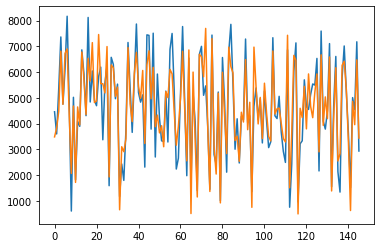

In [53]:
# Ploting true vs prediction for test data
plt.plot(range(len(test_y)),test_y)
plt.plot(range(len(test_y)),test_pred)


### Residual analysis

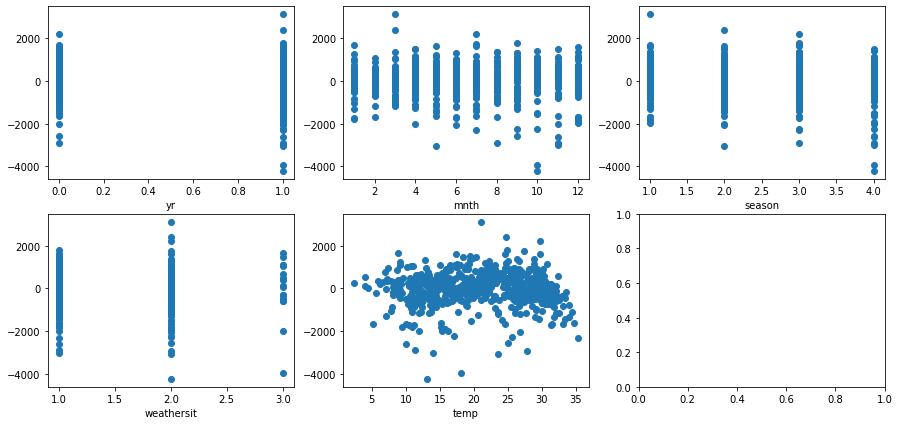

In [73]:
# Scatter plot
fig, ax = plt.subplots(2,3, figsize=(15,7))
for itr, col in enumerate(["yr", "mnth", "season", "weathersit", "temp"]):
    residuals = train_y - train_pred
    ax[itr//3, itr%3].scatter(train_x[col], residuals)
    ax[itr//3, itr%3].set_xlabel(col)

Since we can not find any trend or relation between target and indipendent variable we can say linear regression is valid.

<AxesSubplot:xlabel='cnt', ylabel='Count'>

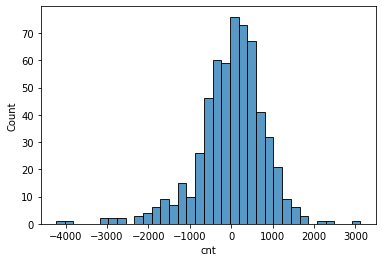

In [109]:
# Checking error distribution for train data
residuals = train_y - train_pred
sns.histplot(residuals)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

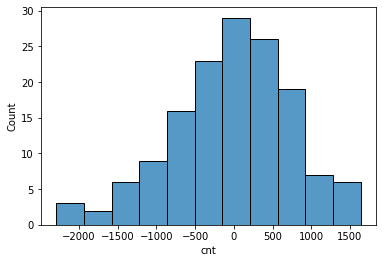

In [110]:
# Checking error distribution for test data
residuals = test_y - test_pred
sns.histplot(residuals)

- Distribution is normal
- Mean is at 0

=========================================
License
=========================================

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)